# Data Visualisation
The goal of this exercise is to present various forms of data visualisation, such as scatter plots, bar plots, box plots, histograms and more.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For the first few examples, a dataset of statistics on recent graduates grouped by college major will be used.

In [5]:
recent_grads = pd.read_csv("datasets/recent-grads.csv")

In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [8]:
# Drop rows containing null values
recent_grads = recent_grads.dropna()

## Scatter plots
Scatter plots can be used to visualise individual datapoints and visually identify trends and data clusters.

Text(0.5,1,'Full-time employed vs. Median wage')

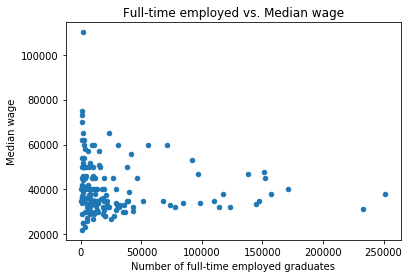

In [12]:
fig, ax = plt.subplots()
recent_grads.plot.scatter(x="Full_time",y="Median",ax=ax)
ax.set_xlabel("Number of full-time employed graduates")
ax.set_ylabel("Median wage")
ax.set_title("Full-time employed vs. Median wage")

Text(0.5,1,'Fraction of women vs. Median wage')

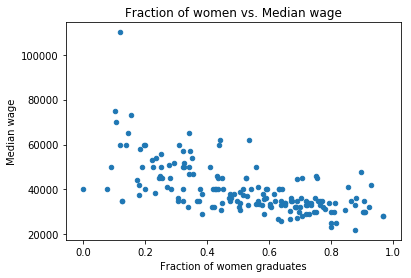

In [15]:
fig, ax = plt.subplots()
recent_grads.plot.scatter(x="ShareWomen",y="Median",ax=ax)
ax.set_xlabel("Fraction of women graduates")
ax.set_ylabel("Median wage")
ax.set_title("Fraction of women vs. Median wage")

- Students in more popular majors appear to make equal or less money than colleagues in less popular majors.
- Students majored in subjects that were majority female make less money than colleagues majored in subjects that were majority male.

## Histograms
Histograms can be used to visualise the distribution of data.

Text(0,0.5,'Counts')

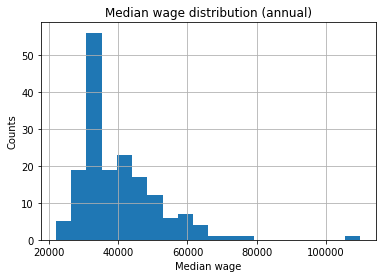

In [18]:
h1 = recent_grads["Median"].hist(bins=20)
h1.set_title("Median wage distribution (annual)")
h1.set_xlabel("Median wage")
h1.set_ylabel("Counts")

Text(0,0.5,'Counts')

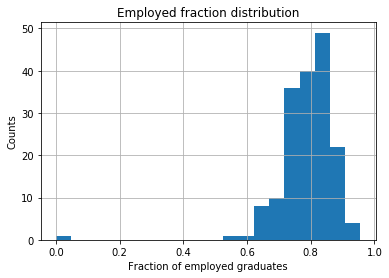

In [19]:
recent_grads["Employed_fraction"] = recent_grads["Employed"]/recent_grads["Total"]
h1 = recent_grads["Employed_fraction"].hist(bins=20)
h1.set_title("Employed fraction distribution")
h1.set_xlabel("Fraction of employed graduates")
h1.set_ylabel("Counts")

Text(0,0.5,'Counts')

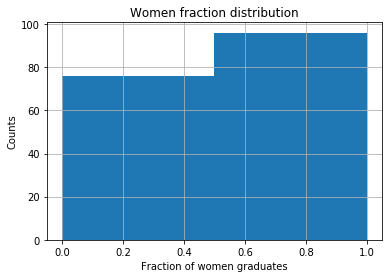

In [20]:
h1 = recent_grads["ShareWomen"].hist(bins=2,range=(0,1))
h1.set_title("Women fraction distribution")
h1.set_xlabel("Fraction of women graduates")
h1.set_ylabel("Counts")

- 76 majors (44.2%) are predominantly male, while 96 majors (55.8%) are predominantly female.
- The most common median salary range is $30000-35000
- The employed fraction of graduates for most majors is between .7 and .9

## Scatter matrix
Scatter matrices can be used to rapidly visualise the relationship between multiple variables. The diagonal shows the histogram distribution of each variable while the other elements are scatter plots of each variables combination.

In [21]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6B7D490B8>,
      dtype=object)

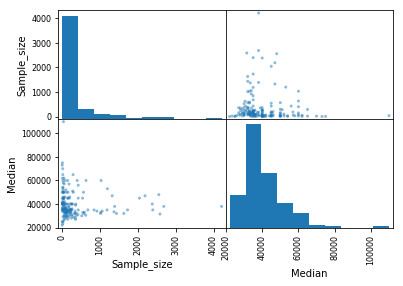

In [22]:
scatter_matrix(recent_grads[["Sample_size","Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A28745C198>,
      dtype=object)

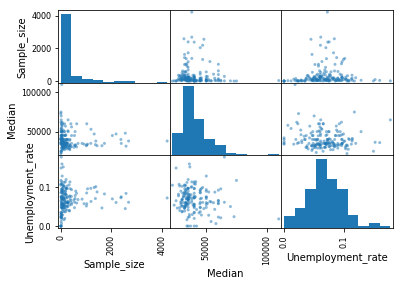

In [29]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]])

## Bar plots
Bar plots can be used to visualise and compare values corresponding to different categories, especially in an ordered form.

In [23]:
recent_grads_SW_sort = recent_grads.sort_values("ShareWomen")

In [24]:
recent_grads_UR_sort = recent_grads.sort_values("Unemployment_rate")

Text(0.5,1,'College majors by smallest and largest fractions of women graduates')

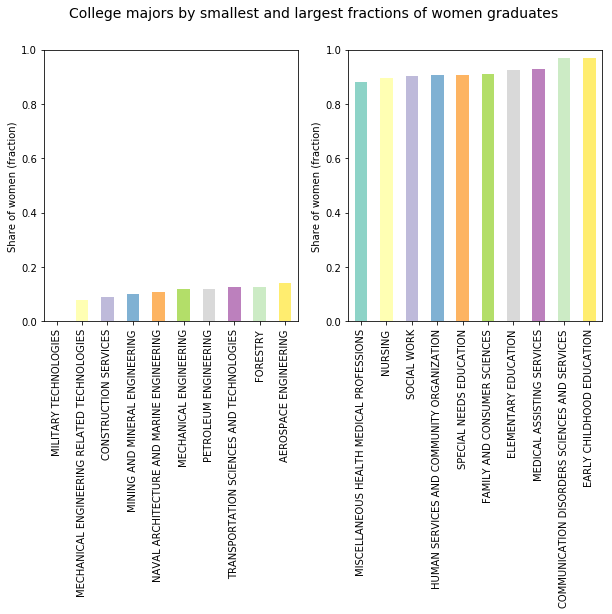

In [28]:
colours = [plt.cm.Set3(i) for i in np.linspace(0,1,10)]
fig, axes = plt.subplots(1,2,figsize=(10,5))
recent_grads_SW_sort[:10].plot.bar(x='Major', y='ShareWomen', ax=axes[0], legend=False, color=colours)
axes[0].set_ylim(0,1)
axes[0].set_ylabel("Share of women (fraction)")
axes[0].set_xlabel("")
recent_grads_SW_sort[-10:].plot.bar(x='Major', y='ShareWomen', ax=axes[1], legend=False, color=colours)
axes[1].set_ylim(0,1)
axes[1].set_ylabel("Share of women (fraction)")
axes[1].set_xlabel("")
fig.suptitle("College majors by smallest and largest fractions of women graduates", fontsize=14, y= 1)

Text(0.5,1,'College majors by smallest and largest unemployment rates')

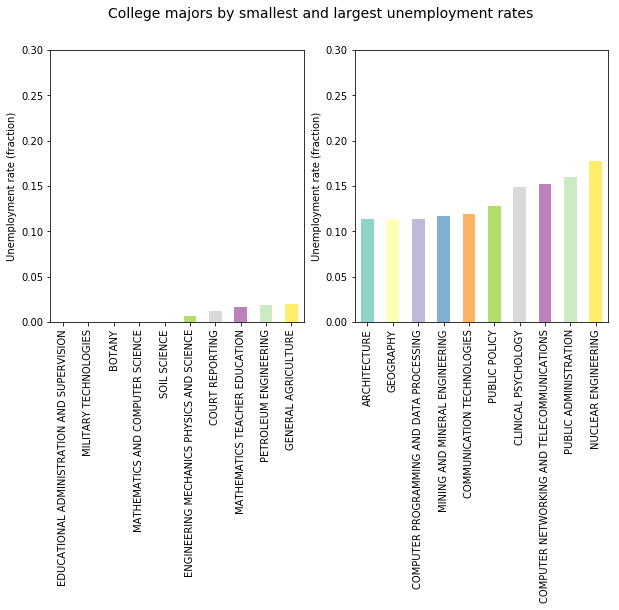

In [33]:
colours = [plt.cm.Set3(i) for i in np.linspace(0,1,10)]
fig, axes = plt.subplots(1,2,figsize=(10,5))
recent_grads_UR_sort[:10].plot.bar(x='Major', y='Unemployment_rate', ax=axes[0], legend=False, color=colours)
axes[0].set_ylim(0,.3)
axes[0].set_ylabel("Unemployment rate (fraction)")
axes[0].set_xlabel("")
recent_grads_UR_sort[-10:].plot.bar(x='Major', y='Unemployment_rate', ax=axes[1], legend=False, color=colours)
axes[1].set_ylim(0,.3)
axes[1].set_ylabel("Unemployment rate (fraction)")
axes[1].set_xlabel("")
fig.suptitle("College majors by smallest and largest unemployment rates", fontsize=14, y= 1)

Combining bar plots is also a nice way to add a further layer of information to the plot.

In [35]:
recent_grads_by_category = recent_grads.groupby("Major_category").agg(np.mean)
recent_grads_by_category.reset_index(inplace=True)
recent_grads_by_category["G_Gap"] = recent_grads_by_category["Men"]-recent_grads_by_category["Women"]
recent_grads_by_category = recent_grads_by_category.sort_values("G_Gap")

Text(0.5,1,'Number of graduates by major category')

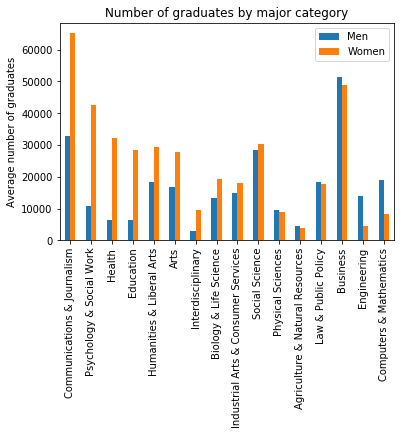

In [37]:
fig, axes = plt.subplots()
recent_grads_by_category.plot.bar(x="Major_category",y=["Men","Women"],ax=axes)
axes.set_xlabel("")
axes.set_ylabel("Average number of graduates")
axes.set_title("Number of graduates by major category")

## Box plots
Box plots are a great way to convey information about the properties of a distribution of data.
- The middle line in the box represents the median of the distribution.
- The upper and lower line of the box represent the first and third quartile (25th and 75th percentile) of the distribution.
- The whiskers can represent a variety of parameters e.g. the minimum and maximum of all data or the lowest datum within 1.5 IQR of first quartile and the highest datum within 1.5 IQR of third quartile (IQR stands for Inter-Quartile Range, i.e. the difference between first and third quartiles.)
- Further markers represent data outside the whiskers, if any are present.

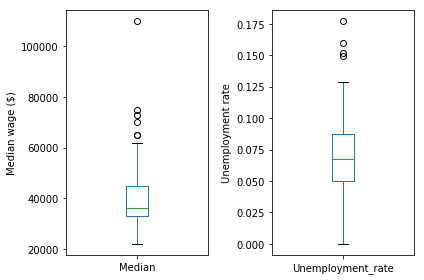

In [42]:
fig, axes = plt.subplots(1,2)
recent_grads["Median"].plot.box(ax=axes[0])
axes[0].set_ylabel("Median wage ($)")
recent_grads["Unemployment_rate"].plot.box(ax=axes[1])
axes[1].set_ylabel("Unemployment rate")
plt.tight_layout()

## Hexbin plot
The hexbin plot is a cross between a histogram and a scatter plot, or in other words a form of 2D histogram. It conveys the density of a bi-variate distribution.

Text(0.5,1,'Fraction of women vs. Median wage')

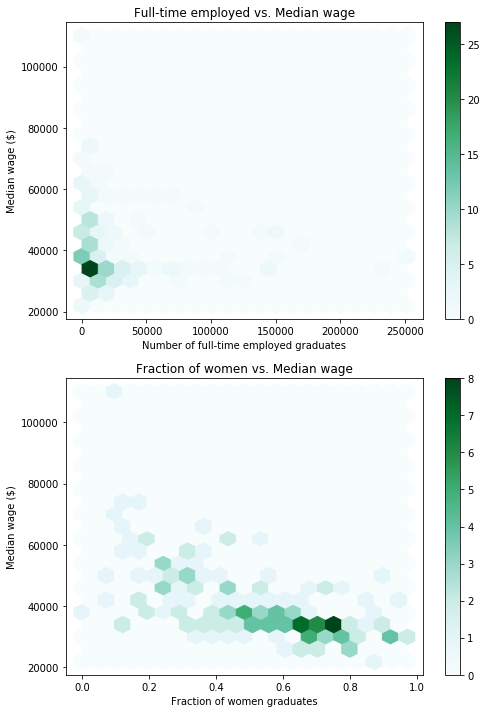

In [48]:
fig, axes = plt.subplots(2,1,figsize=(8,12))
recent_grads.plot.hexbin(x="Full_time",y="Median",ax=axes[0],gridsize=20)
axes[0].set_xlabel("Number of full-time employed graduates")
axes[0].set_ylabel("Median wage ($)")
axes[0].set_title("Full-time employed vs. Median wage")
recent_grads.plot.hexbin(x="ShareWomen",y="Median",ax=axes[1],gridsize=20)
axes[1].set_xlabel("Fraction of women graduates")
axes[1].set_ylabel("Median wage ($)")
axes[1].set_title("Fraction of women vs. Median wage")

## Gallery - further examples
The following gallery of examples was produced using a dataset of WNBA players statistics.

In [49]:
wnba = pd.read_csv("datasets/wnba.csv")

In [50]:
### The dataset contains a faux-numeric "Experience" column. This is converted into string ordinals before visualisation
# Define a function to convert R (rookie) into a value consistent with the rest of the data
def helper(a):
    if a == "R":
        return 0
    else:
        return int(a)
wnba["Experience"] = wnba["Experience"].apply(helper)
# Define a new ordinal column to qualify each player's experience.
def exp_ordinal(n):
    if n == 0:
        return "Rookie"
    if n >= 1 and n <= 3:
        return "Little Experience"
    if n == 4 or n == 5:
        return "Experienced"
    if n >= 6 and n <= 10:
        return "Very Experienced"
    if n > 10 :
        return "Veteran"
wnba["Exp_ordinal"] = wnba["Experience"].apply(exp_ordinal)

###  Bar plots
Bar plots can also be made in horizontal form.

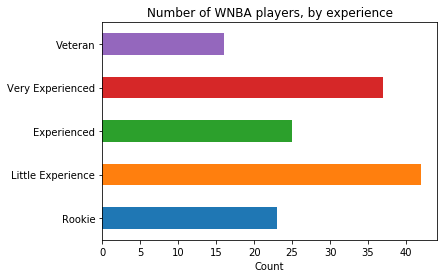

In [54]:
var.value_counts().iloc[[3,0,2,1,4]].plot.barh(title="Number of players in WNBA by level of experience")
plt.title("Number of WNBA players, by experience")
plt.xlabel("Count")
plt.show()

### Pie charts
Pie charts are useful to convey the relative fractions which make up a total.

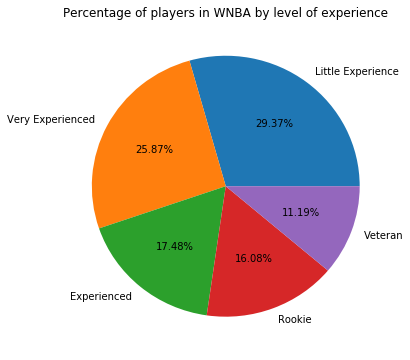

In [56]:
var.value_counts().plot.pie(figsize=(6,6),title="Percentage of players in WNBA by level of experience",autopct="%.2f%%")
plt.show()

### Superimposed histograms

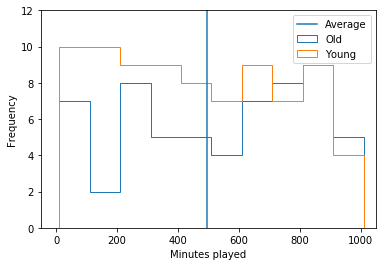

In [58]:
wnba[wnba.Age >= wnba["Age"].mean()]["MIN"].plot.hist(range=(10,1010),bins=10,histtype="step",label="Old",legend=True)
wnba[wnba.Age < wnba["Age"].mean()]["MIN"].plot.hist(range=(10,1010),bins=10,histtype="step",label="Young",legend=True)
plt.axvline(wnba["MIN"].mean(),label="Average")
plt.axis([-50, 1050, 0, 12])
plt.xlabel("Minutes played")
plt.legend()
plt.show()

### Kernel Density Estimation plots (KDEs)
KDEs are an estimation of the underlying probability density function of a variable. It may be thought of as a smoothed version of a histogram.

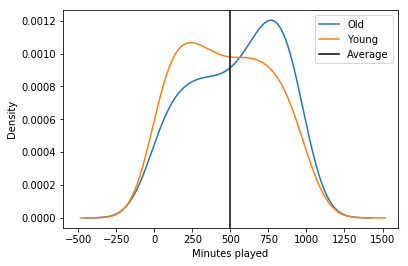

In [59]:
wnba[wnba.Age >= wnba["Age"].mean()]["MIN"].plot.kde(label="Old",legend=True)
wnba[wnba.Age < wnba["Age"].mean()]["MIN"].plot.kde(label="Young",legend=True)
plt.axvline(wnba["MIN"].mean(),label="Average",c="black")
plt.xlim([-600, 1600])
plt.xlabel("Minutes played")
plt.legend()
plt.show()

## Seaborn
Seaborn is a visualisation library which offers advanced visualisation tools.

The following examples were made using a dataset describing passengers embarked on the RMS Titanic.

In [61]:
raw = pd.read_csv("datasets/train.csv")
raw = raw.loc[:,["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
titanic = raw.dropna()

C:\Users\jacop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


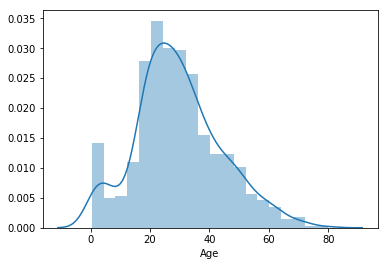

In [62]:
# Seaborn plot: distplot()
sns.distplot(titanic["Age"])

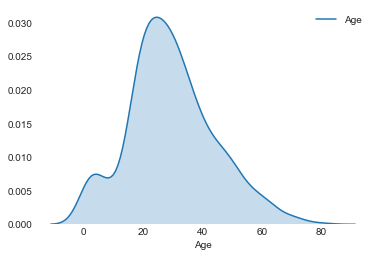

In [63]:
# Seaborn plot: kdeplot()
sns.set_style("white")
sns.kdeplot(titanic["Age"],shade=True)
plt.xlabel("Age")
sns.despine(left=True,bottom=True)

The FacetGrid() method can be used to show the distribution of a variable limitedly to up to two sets of other variables. For example, in this example the KDE of the Age variable is shown relative to the passenger class and to whether the passengers survived or not. 

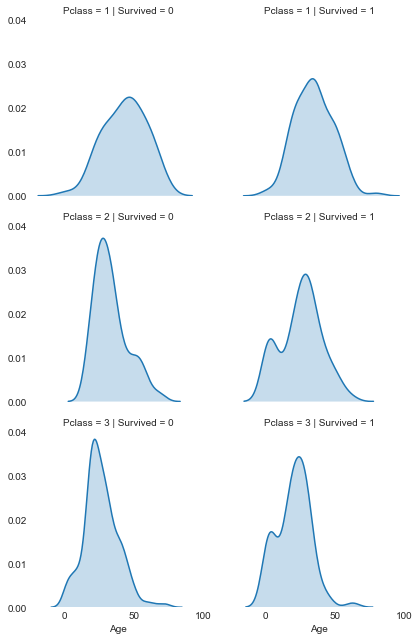

In [64]:
# Seaborn plot: FacetGrid()
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)

Colour may be used to add a further layer of information to the plots. For example, the next plot adds gender information to the previous plots.

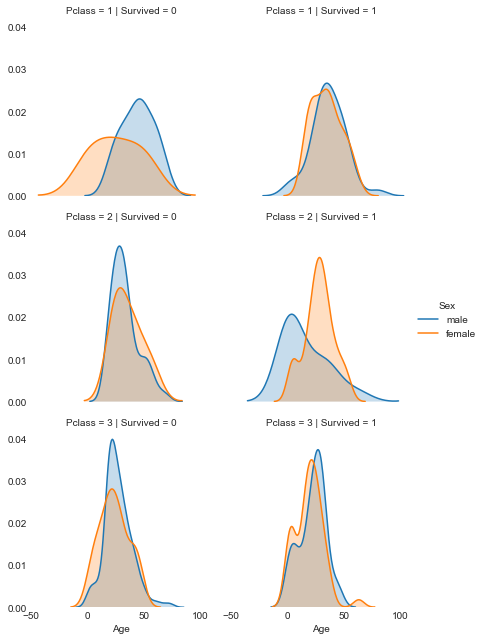

In [65]:
# Seaborn plot: FacetGrid() 3
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True,bottom=True)

### Strip plots
Strip plots are a cross between scatter plots and box plots. They convey much of the same information as box plots, but sacrifice explicit information on quartiles to plot the data points directly instead. Random horizontal jitter is usually added to the data to improve readability.

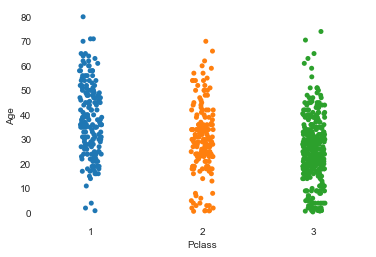

In [72]:
# Strip plots
g = sns.stripplot(x="Pclass", y="Age", data=titanic,jitter=True)
sns.despine(left=True,bottom=True)

## Basemap
Basemap is an extension of the matplot library which is dedicated to cartography. The next few examples were produced using datasets on airports and airplane routes.

In [73]:
from mpl_toolkits.basemap import Basemap
airports = pd.read_csv("datasets/airports.csv")
routes = pd.read_csv("datasets/routes.csv")

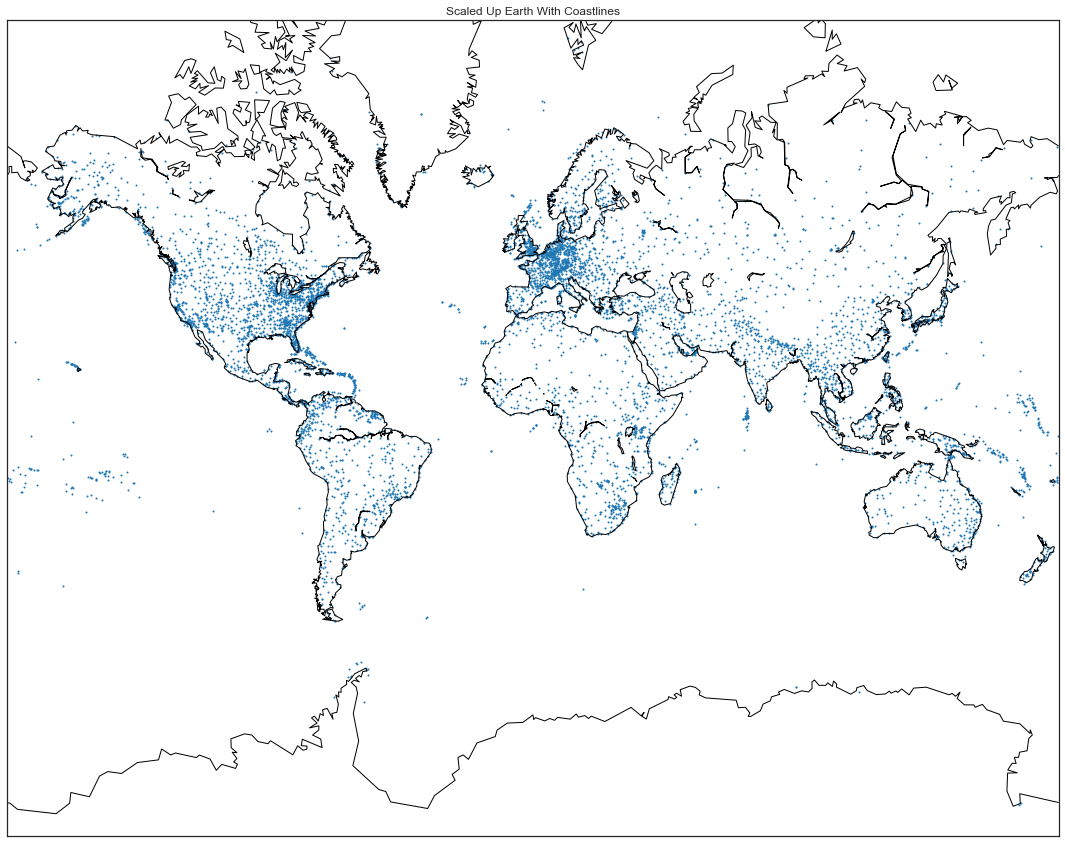

In [74]:
# Example 1: airport locations
fig1, ax = plt.subplots(figsize=(20,15))
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()

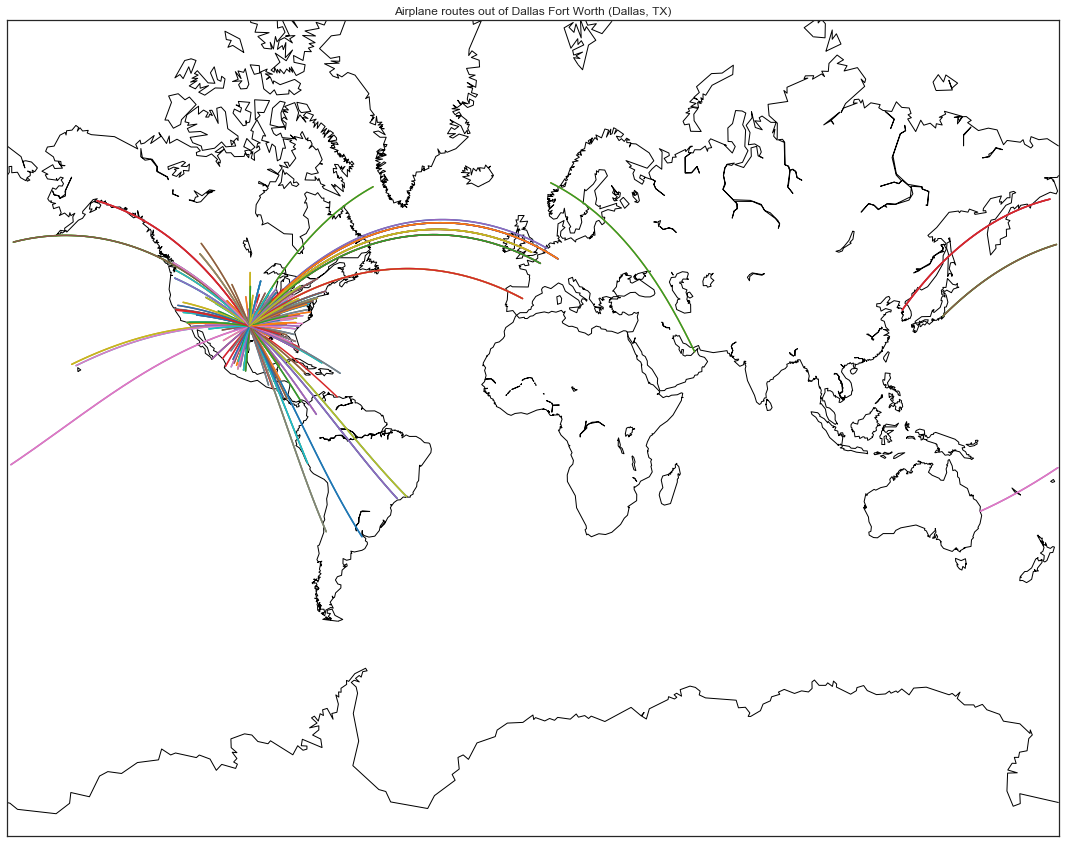

In [79]:
# Example 2: routes out of Dallas Fort Worth
geo_routes = pd.read_csv("datasets/geo_routes.csv")
def create_great_circles(df,m):
    for index, row in df.iterrows():
        m.drawgreatcircle(row["start_lon"],row["start_lat"],row["end_lon"],row["end_lat"])
dfw = geo_routes[geo_routes["source"] == "DFW"]         
fig2, ax = plt.subplots(figsize=(20,15))
ax.set_title("Airplane routes out of Dallas Fort Worth (Dallas, TX)")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
create_great_circles(dfw,m)